In [1]:
import pyspark
from pyspark import SparkContext
from pyspark import SQLContext
sc = SparkContext()
sql = SQLContext(sc)

**READING THE .CSV FILE OF THE DATASET**

In [2]:
data_path = "../input/csv/"                                # path directory to input csv files
data_opath = "../output/csv/"                               # path directory to output csv files

data_matches = (sql.read.format("com.databricks.spark.csv").option("header", "true").load(data_path+"matches.csv"))
data_matches.show()

+---+------+----------+----------+--------------------+--------------------+--------------------+-------------+------+----------+--------------------+-----------+--------------+---------------+--------------------+-----------+--------------+-------+
| id|season|      city|      date|               team1|               team2|         toss_winner|toss_decision|result|dl_applied|              winner|win_by_runs|win_by_wickets|player_of_match|               venue|    umpire1|       umpire2|umpire3|
+---+------+----------+----------+--------------------+--------------------+--------------------+-------------+------+----------+--------------------+-----------+--------------+---------------+--------------------+-----------+--------------+-------+
|  1|  2008| Bangalore|2008-04-18|Kolkata Knight Ri...|Royal Challengers...|Royal Challengers...|        field|normal|         0|Kolkata Knight Ri...|        140|             0|    BB McCullum|M Chinnaswamy Sta...|  Asad Rauf|   RE Koertzen|   null|


**TAKING THE TWO TEAMS AND THE WINNER FROM THE DATASET**

In [3]:
team_winner = data_matches.select(data_matches.team1,data_matches.team2,data_matches.winner)
team_winner.show()

+--------------------+--------------------+--------------------+
|               team1|               team2|              winner|
+--------------------+--------------------+--------------------+
|Kolkata Knight Ri...|Royal Challengers...|Kolkata Knight Ri...|
| Chennai Super Kings|     Kings XI Punjab| Chennai Super Kings|
|    Rajasthan Royals|    Delhi Daredevils|    Delhi Daredevils|
|      Mumbai Indians|Royal Challengers...|Royal Challengers...|
|     Deccan Chargers|Kolkata Knight Ri...|Kolkata Knight Ri...|
|     Kings XI Punjab|    Rajasthan Royals|    Rajasthan Royals|
|     Deccan Chargers|    Delhi Daredevils|    Delhi Daredevils|
| Chennai Super Kings|      Mumbai Indians| Chennai Super Kings|
|     Deccan Chargers|    Rajasthan Royals|    Rajasthan Royals|
|     Kings XI Punjab|      Mumbai Indians|     Kings XI Punjab|
|Royal Challengers...|    Rajasthan Royals|    Rajasthan Royals|
|Kolkata Knight Ri...| Chennai Super Kings| Chennai Super Kings|
|      Mumbai Indians|   

**CHECKING FOR THE MATCHES OF 'KOLKATA KNIGHT RIDERS'**

In [4]:
team1_= team_winner.filter("team1 == 'Kolkata Knight Riders'")
team1_.show()

+--------------------+--------------------+--------------------+
|               team1|               team2|              winner|
+--------------------+--------------------+--------------------+
|Kolkata Knight Ri...|Royal Challengers...|Kolkata Knight Ri...|
|Kolkata Knight Ri...| Chennai Super Kings| Chennai Super Kings|
|Kolkata Knight Ri...|      Mumbai Indians|      Mumbai Indians|
|Kolkata Knight Ri...|Royal Challengers...|Kolkata Knight Ri...|
|Kolkata Knight Ri...|     Deccan Chargers|Kolkata Knight Ri...|
|Kolkata Knight Ri...|    Delhi Daredevils|Kolkata Knight Ri...|
|Kolkata Knight Ri...|      Mumbai Indians|      Mumbai Indians|
|Kolkata Knight Ri...| Chennai Super Kings| Chennai Super Kings|
|Kolkata Knight Ri...|    Rajasthan Royals|    Rajasthan Royals|
|Kolkata Knight Ri...|     Deccan Chargers|     Deccan Chargers|
|Kolkata Knight Ri...|Royal Challengers...|Royal Challengers...|
|Kolkata Knight Ri...|     Kings XI Punjab|     Kings XI Punjab|
|Kolkata Knight Ri...|   

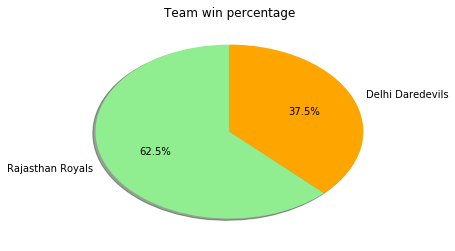

In [5]:
import matplotlib.pyplot as plt  #importing the required library for the visualization

from ipywidgets import widgets, interactive  #using the widgets for the dropdown menu and interactive for interactive visuals


#Taking the first team from the list
first_team = widgets.Dropdown(
    #give the options which should be reflected in the list
    options=['Rajasthan Royals','Chennai Super Kings','Deccan Chargers','Gujarat Lions','Delhi Daredevils','Mumbai Indians','Kochi Tuskers Kerala','Royal Challengers Bangalore','Pune Warriors','Rising Pune Supergiants','Sunrisers Hyderabad','Kolkata Knight Riders','Kings XI Punjab'],
    value='Rajasthan Royals',  #the first team choosen as 'Rajasthan Royals'
    description='Team1:',
)

#Taking the second team from the list
second_team = widgets.Dropdown(
    options=['Rajasthan Royals','Chennai Super Kings','Deccan Chargers','Gujarat Lions','Delhi Daredevils','Mumbai Indians','Kochi Tuskers Kerala','Royal Challengers Bangalore','Pune Warriors','Rising Pune Supergiants','Sunrisers Hyderabad','Kolkata Knight Riders','Kings XI Punjab'],
    value='Delhi Daredevils',  #the second team choosen as 'Delhi Daredevils'
    description='Team2:',
)

#define a function plotit to plot the team vs team win percentage
def plotit(first_team,second_team):
    if first_team == second_team:   #check whether the two teams selected are same or not.
        print "SAME TEAM"
    else:  
        
        team1_= team_winner.filter(team_winner.team1 == first_team)
        team11_ = team_winner.filter(team_winner.team2 == first_team)
        team2_= team1_.filter(team1_.team2 == second_team)
        team22_ = team11_.filter(team11_.team1 == second_team)
        
        winners1_ = team2_.filter(team2_.winner == first_team)#checking the matches won by the first_team
        winners11_ = team22_.filter(team22_.winner == first_team)
        winners2_ = team2_.filter(team2_.winner == second_team)  #checking the matches won by the second_team
        winners22_ = team22_.filter(team22_.winner == second_team)
        
        
        #number of matches won by first team
        first_team_win = winners1_.count() 
        first_team_win2 = winners11_.count()
         
        #number of matches won by second team
        second_team_win = winners2_.count()
        second_team_win2 = winners22_.count()        
        
        
        total_matches = team22_.count() + team2_.count() #taking the count of total number of matches
        
        if first_team_win+second_team_win+first_team_win2+second_team_win2 != total_matches:    #checking for any matches without any result
            total_matches = total_matches - (total_matches -(first_team_win + second_team_win + first_team_win2 + second_team_win2))  #calculating new total matches played with significant result
        
        if total_matches == 0:  #checking if the teams ever played a match between each other
            print 'NO MATCHES PLAYED BEFORE'
            
        else:
            first_team_percent = ((first_team_win + first_team_win2) * 100)/float(total_matches) #calculating the percentage win for first team
            second_team_percent = ((second_team_win + second_team_win2) * 100)/float(total_matches) #calculating the percentage win for second team
        
            labels = (first_team,second_team)  #setting the labels for the visualization
        
            sizes = (first_team_percent,second_team_percent)  #setting the percentages for the visualization
        
            colors = ['lightgreen', 'orange'] # taking the colors
        
            plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%',shadow=True, startangle=90)  #making a pie
            plt.title("Team win percentage") #setting the title
            plt.show()  #displaying the pie chart
    
interactive(plotit, first_team=first_team,second_team=second_team)  #making the view interactive using ipywidgets